Recurrent Neural networks are mainly used in continues data.Like Time series data.eg: Apple siri, Amazon alexa, Google assistant.

Music generation data, chatbox texts are all examples of continues data

In [1]:
# we have two datasets in hand.
# 1. Google train dataset 
# 2. Google test dataset

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#importing the traing set
dataset_train = pd.read_csv("/content/dataset/google_stock_price_train.csv")
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
#we want values of this particular colum in almost same range.
#inorder to do that , we do featue scaling

 **Feature scaling**

In [6]:
#we scale the values in column using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
#creating a data structure with 60 timesteps and 1 output


LSTM stores the data from previous 60 inputs neurons and predicts the next output.

In [9]:
x_train = []
y_train = []
for i in range(60,len(training_set_scaled)):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
sd = pd.DataFrame(x_train)
sd

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,...,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,...,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,...,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716
3,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,...,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541
4,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,...,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,0.934445,0.924939,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,...,0.931766,0.941141,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759
1194,0.924939,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,...,0.941141,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043
1195,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,0.934835,...,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043,0.951633
1196,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,0.934835,0.931394,...,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043,0.951633,0.957251


In [11]:
st = pd.DataFrame(y_train)
st

,0
0,0.086279
1,0.084716
2,0.074541
3,0.078838
4,0.072383
...,...
1193,0.952043
1194,0.951633
1195,0.957251
1196,0.937960


In keras, for traing models input should be in specific shape.

3D (batch size, timesteps, dimension)

In [12]:

#reshape the training set
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [13]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

### **Building RNN**

In [14]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

Droupout layer eliminates nueronts in network while outputs zero.

In [15]:
#initializing the RNN
regressor = Sequential()

In [16]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [17]:
#Adding the second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
#Adding the third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
#Adding the fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [20]:
#Adding the output layer
regressor.add(Dense(units = 1))

Here the above Dense layer outputs only one output.So that it will be the predicted output

In [23]:
regressor.compile(loss='mse', optimizer='adam')

In [24]:
#Fitting the RNN to the training set
regressor.fit(x_train,y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 123ms/step - loss: 0.0430
Epoch 2/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0047
Epoch 13/100

### Making Predictions & Visualizing the results

In [25]:
#Getting the real stock price of 2017
dataset_test = pd.read_csv("/content/dataset/google_stock_price_test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

In [27]:
real_stock_price.shape

(20, 1)

In [29]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [30]:
#Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [31]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [32]:
inputs.shape

(80, 1)

In [33]:
x_test = []
for i in range(60, 80):
  x_test.append(inputs[i - 60:i, 0])

x_test = np.array(x_test)

In [35]:
#reshape into 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
x_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [37]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [38]:
predicted_stock_price

array([[788.8788 ],
       [786.0451 ],
       [786.17444],
       [787.62506],
       [790.516  ],
       [795.58026],
       [800.3019 ],
       [802.05225],
       [802.17737],
       [802.28625],
       [802.74457],
       [803.101  ],
       [803.2355 ],
       [803.82697],
       [804.7782 ],
       [808.9988 ],
       [815.4457 ],
       [822.0677 ],
       [825.39417],
       [821.3161 ]], dtype=float32)

In [42]:
saml = pd.DataFrame(predicted_stock_price)
saml


,0
0,788.878784
1,786.045105
2,786.174438
3,787.625061
4,790.515991
5,795.580261
6,800.301880
7,802.052246
8,802.177368
9,802.286255


In [43]:
saml.shape

(20, 1)

### visualizing the results

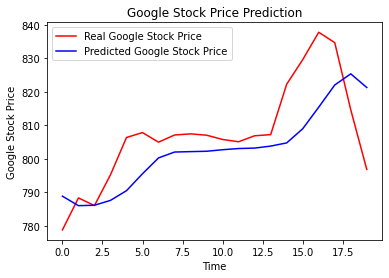

In [44]:
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()